In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

sns.set_style("darkgrid")

In [2]:
cancer_data = load_breast_cancer()

In [3]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer_features = pd.DataFrame(cancer_data["data"], columns=cancer_data["feature_names"])

In [6]:
cancer_data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [7]:
cancer_features.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Padroninzando os dados

In [8]:
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(cancer_features)

cancer = pd.DataFrame(cancer_scaled, columns=cancer_data["feature_names"])

In [9]:
cancer["diagnostic"] = cancer_data["target"]

In [10]:
cancer.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostic
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0


## Visualizando os dados da variaver alvo

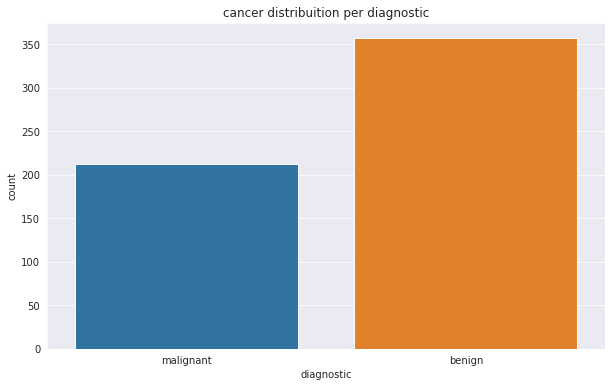

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x="diagnostic", data=cancer)
plt.xticks([0,1], labels=["malignant","benign"])
plt.title("cancer distribuition per diagnostic")
plt.show()

# separando os dados em treino e teste

In [12]:
x = cancer.drop("diagnostic", axis=1)
y = cancer["diagnostic"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=44)

# Regressão Logistica

In [13]:
model_lr = LogisticRegression(random_state=0)
model_lr.fit(x_train, y_train)
pred_y = model_lr.predict(x_test)

### Avaliando o modelo

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<AxesSubplot:>

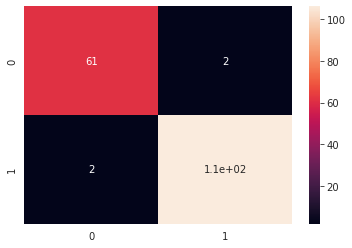

In [16]:
sns.heatmap(confusion_matrix(y_test, pred_y), annot=True)

In [17]:
confusion_matrix(y_test, pred_y)

array([[ 61,   2],
       [  2, 106]])

# Suport Vector Machine

In [18]:
model_svc = SVC(kernel="rbf",C=1, gamma=0.01)
model_svc.fit(x_train, y_train)
y_pred_svc = model_svc.predict(x_test)

### Avaliando o modelo

In [19]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [20]:
confusion_matrix(y_test, y_pred_svc)

array([[ 58,   5],
       [  1, 107]])

# Naeve Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
model_NB = GaussianNB() # instanciando/criando o modelo
model_NB.fit(x_train, y_train) # treinando o modelo
y_pred_NB = model_NB.predict(x_test) # faendo as predições das features de teste (teste)

### Avaliando o modelo

In [23]:
c_matrix = confusion_matrix(y_test, y_pred_NB)
c_matrix

array([[ 58,   5],
       [  4, 104]])

<AxesSubplot:>

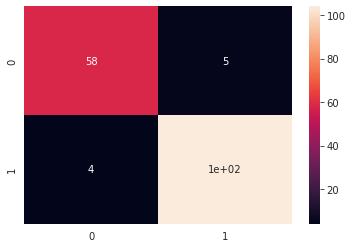

In [24]:
sns.heatmap(c_matrix, annot=True)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
print("Accurracy: {}".format(accuracy_score(y_test,y_pred_NB)))
print("Precision: {}".format(precision_score(y_test, y_pred_NB)))
print("recall: {}".format(recall_score(y_test,y_pred_NB)))
print("f1 score: {}".format(f1_score(y_test, y_pred_NB)))

Accurracy: 0.9473684210526315
Precision: 0.9541284403669725
recall: 0.9629629629629629
f1 score: 0.9585253456221199


In [27]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.95      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# Decision True

In [28]:
from sklearn.tree import DecisionTreeClassifier 

In [29]:
model_tree = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, criterion='gini')
model_tree.fit(x_train, y_train)
y_pred_tree = model_tree.predict(x_test)

In [30]:
print(accuracy_score(y_test, y_pred_tree))

0.935672514619883


In [31]:
print(precision_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

0.9369369369369369
0.9629629629629629


In [32]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [33]:
confusion_matrix(y_test, y_pred_tree)

array([[ 56,   7],
       [  4, 104]])

In [34]:
from sklearn.tree import plot_tree

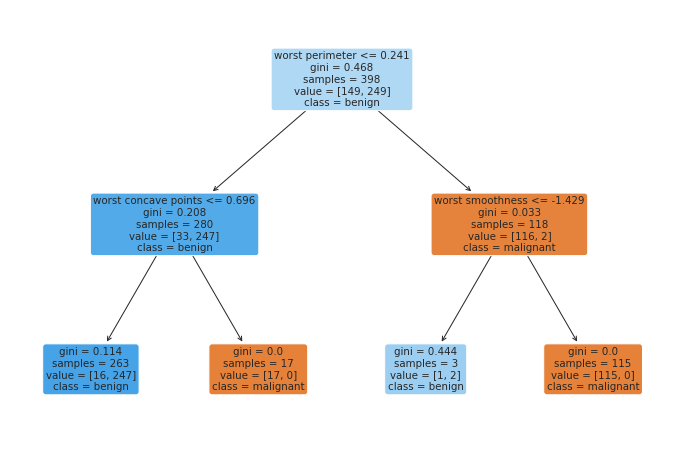

In [35]:
plt.figure(figsize=(12,8))
plot_tree(model_tree, feature_names = x.columns, rounded = True, filled=True, class_names =  cancer_data["target_names"])
plt.show()

# K-Nearest Neighbors KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=2)

model_KNN.fit(x_train, y_train)

y_pred_KNN = model_KNN.predict(x_test)

In [37]:
confusion_matrix(y_test, y_pred_KNN)

array([[ 61,   2],
       [  7, 101]])

<AxesSubplot:>

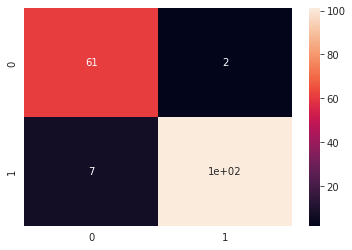

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred_KNN),  annot=True)

In [42]:
precision_score(y_test, y_pred_KNN)

0.9805825242718447

In [43]:
recall_score(y_test, y_pred_KNN)

0.9351851851851852

### Encontro o melhor valor para k

In [50]:
error_rate = []

for i in range(1, 40):
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(x_train, y_train)
    y_pred_KNN_i = model_KNN.predict(x_test)
    error_rate.append(np.mean(y_pred_KNN_i != y_test))

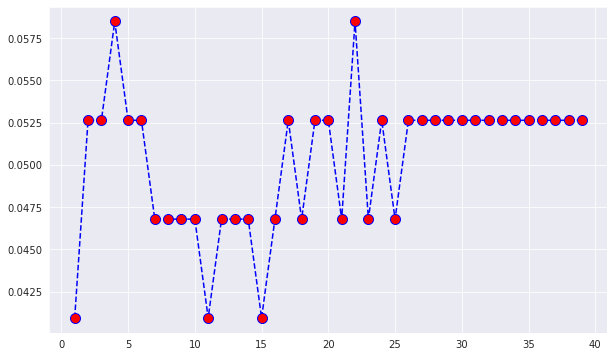

In [51]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [64]:
model_KNN = KNeighborsClassifier(n_neighbors=1)

model_KNN.fit(x_train, y_train)

y_pred_KNN = model_KNN.predict(x_test)

In [65]:
accuracy_score(y_test, y_pred_KNN)

0.9590643274853801

In [66]:
confusion_matrix(y_test, y_pred_KNN)

array([[ 60,   3],
       [  4, 104]])